In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def fi_plot(x,a,b,c):
    f = ((-b-a*x)/c)**(-1)
    return f

In [4]:
def dist_p(x0,y0,a,b,c):

    A0 = -2*a*c**2 - 2*x0*b**3 - 2*a*b*c*y0
    A1 = 2*b**3 - 6*a*x0*b**2 - 2*c*y0*a**2
    A2 = 6*a*b**2 - 6* a**2 *b*x0
    A3 = 6*b*a**2 - 2*x0*a**3
    A4 = 2*a**3
    
    roots = np.polynomial.polynomial.Polynomial([A0,A1,A2,A3,A4]).roots()
    real_roots = roots[roots.imag == 0].real
    
    xr = real_roots
    yr = -c/(b+ xr*a)
    
    dist2 = (xr - x0)**2 + (yr - y0)**2
    dist = dist2**.5
    
    xr = xr[dist == min(dist)]
    yr = yr[dist == min(dist)]
    
    return(xr,yr,min(dist))

In [5]:
def dist_p_l(x0l,y0l,a,b,c):
    xrl = np.zeros(len(x0l))
    yrl = np.zeros(len(y0l))
    distl = np.zeros(len(y0l))
    ind=0
    for x0,y0 in zip(x0l,y0l):
        A0 = -2*a*c**2 - 2*x0*b**3 - 2*a*b*c*y0
        A1 = 2*b**3 - 6*a*x0*b**2 - 2*c*y0*a**2
        A2 = 6*a*b**2 - 6* a**2 *b*x0
        A3 = 6*b*a**2 - 2*x0*a**3
        A4 = 2*a**3

        roots = np.polynomial.polynomial.Polynomial([A0,A1,A2,A3,A4]).roots()
        real_roots = roots[roots.imag == 0].real

        xr = real_roots
        yr = -c/(b+ xr*a)

        dist2 = (xr - x0)**2 + (yr - y0)**2
        dist = dist2**.5

        xr = xr[dist == min(dist)]
        yr = yr[dist == min(dist)]
        
        xrl[ind]=xr
        yrl[ind]=yr
        distl[ind]=min(dist)
        ind+=1
    return(xrl,yrl,distl)

In [6]:
def dist_n1n2(x0,y0,xres):
    yres = y0
    dres = abs(x0-xres)
    return(xres,yres,dres)

def dist_n2n3(x0,y0,yres):
    xres = x0
    dres = abs(y0-yres)
    return(xres,yres,dres)

In [194]:
bx0,by0 = np.genfromtxt('3p-mmr.dat',usecols=[0,1],unpack=True)

mask=(bx0<2)&(bx0>4/3.)&(by0<2)&(by0>4/3.)

bx0=bx0[mask]
by0=by0[mask]
# # bx0
# bx0=bx0[:10]
# by0=by0[:10]

In [195]:
df = {'x0':bx0,'y0':by0}
df = pd.DataFrame(df)

In [233]:
df = {'x0':bx0,'y0':by0}
df = pd.DataFrame(df)

r3l=[]
def add_res3(k1,k2,k3):
    global df,dist_p_l,bx0,by0,r3l
    if [k1,k2,k3] in r3l:
        print([k1,k2,k3],' already there')
    else:
        df['x_'+str(k1)+str(k2)+str(k3)],df['y_'+str(k1)+str(k2)+str(k3)],df['dist_'+str(k1)+str(k2)+str(k3)] = dist_p_l(bx0,by0,k1,k2,k3)
        r3l.append([k1,k2,k3])
    return

add_res3(2,-5,3)
add_res3(1,-3,2)
add_res3(1,-5,5)
add_res3(3,-5,2)
add_res3(3,-7,4)
add_res3(1,-2,1)
add_res3(2,-7,5)
add_res3(1,-4,3)
add_res3(4,-7,3)


df['x_n1n2_43'],df['y_n1n2_43'],df['dist_n1n2_43'] = dist_n1n2(bx0,by0,4/3.)
df['x_n2n3_43'],df['y_n2n3_43'],df['dist_n2n3_43'] = dist_n2n3(bx0,by0,4/3.)

df['x_n1n2_75'],df['y_n1n2_75'],df['dist_n1n2_75'] = dist_n1n2(bx0,by0,7/5.)
df['x_n2n3_75'],df['y_n2n3_75'],df['dist_n2n3_75'] = dist_n2n3(bx0,by0,7/5.)

df['x_n1n2_32'],df['y_n1n2_32'],df['dist_n1n2_32'] = dist_n1n2(bx0,by0,3/2.)
df['x_n2n3_32'],df['y_n2n3_32'],df['dist_n2n3_32'] = dist_n2n3(bx0,by0,3/2.)

df['x_n1n2_53'],df['y_n1n2_53'],df['dist_n1n2_53'] = dist_n1n2(bx0,by0,5/3.)
df['x_n2n3_53'],df['y_n2n3_53'],df['dist_n2n3_53'] = dist_n2n3(bx0,by0,5/3.)

df['x_n1n2_74'],df['y_n1n2_74'],df['dist_n1n2_74'] = dist_n1n2(bx0,by0,7/4.)
df['x_n2n3_74'],df['y_n2n3_74'],df['dist_n2n3_74'] = dist_n2n3(bx0,by0,7/4.)

df['x_n1n2_21'],df['y_n1n2_21'],df['dist_n1n2_21'] = dist_n1n2(bx0,by0,2.)
df['x_n2n3_21'],df['y_n2n3_21'],df['dist_n2n3_21'] = dist_n2n3(bx0,by0,2.)

In [234]:
df['MinDistance'] = df.filter(like='dist').min(axis=1)

df['MinRes'] = df.filter(like='dist').idxmin(axis=1)

MinDistInd=[]
for i in range(len(bx0)):
    MinDistInd.append(df.columns.get_loc(df['MinRes'][i]))
df['MinDistInd']=MinDistInd

df['xmin']=[df[df.columns[j-2]][i] for i,j in enumerate(df['MinDistInd'])]

df['ymin']=[df[df.columns[j-1]][i] for i,j in enumerate(df['MinDistInd'])]

<ipython-input-3-d8b4ee3a352a>:2: RuntimeWarning: divide by zero encountered in reciprocal
  f = ((-b-a*x)/c)**(-1)


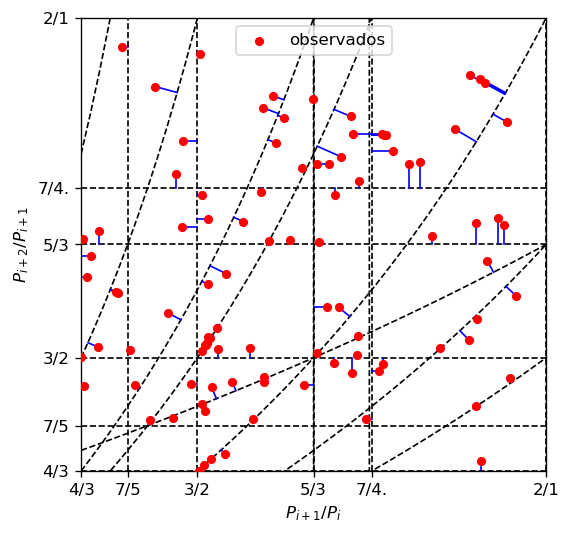

In [235]:
plt.figure(figsize=(5,5),dpi=120)
l1,l2=4/3.,2
plt.xlim(l1,l2)
plt.ylim(l1,l2)



plt.vlines(5/2.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.vlines(2/1.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.vlines(5/3.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.vlines(3/2.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.vlines(7/5.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.vlines(4/3.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.vlines(7/4.,l1,l2,linestyles='dashed',colors='black',lw=1)

plt.hlines(5/2.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.hlines(2/1.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.hlines(5/3.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.hlines(3/2.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.hlines(7/5.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.hlines(4/3.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.hlines(7/4.,l1,l2,linestyles='dashed',colors='black',lw=1)

plt.gca().set_xticks([4/3.,7/5.,3/2.,5/3.,2/1.,5/2.,7/4.])
plt.gca().set_xticklabels(['4/3','7/5','3/2','5/3','2/1','5/2','7/4.'])

plt.gca().set_yticks([4/3.,7/5.,3/2.,5/3.,2/1.,5/2.,7/4.])
plt.gca().set_yticklabels(['4/3','7/5','3/2','5/3','2/1','5/2','7/4.'])


dom=np.linspace(l1,l2,50)
for i in r3l:
    plt.plot(dom,fi_plot(dom,i[0],i[1],i[2]),linestyle='dashed',lw=1,c='black')
    

plt.scatter(bx0,by0,color='red',s=20,zorder=100,label='observados')


for row in range(len(df)):
    plt.plot(df[['x0','xmin']].loc[row].to_numpy(),df[['y0','ymin']].loc[row].to_numpy(),color='blue',lw=1)
    

plt.xlabel('$P_{i+1}/P_{i}$')
plt.ylabel('$P_{i+2}/P_{i+1}$')

plt.xlim(l1,l2)
plt.ylim(l1,l2)

plt.legend(loc='upper center')

plt.savefig('observados.png',bbox_inches='tight',dpi=100)

plt.show()

In [237]:
tot_sum_obs=sum(1./df['MinDistance'])/len(bx0)
tot_sum_obs

10446.725356046527

In [188]:
0.013312208592633887*len(bx0)

1.291284233485487

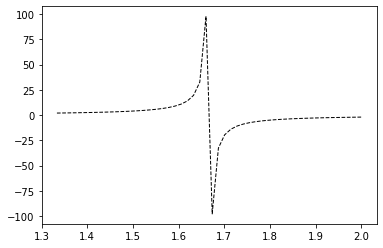

In [143]:
for i in r3l[3:4]:
    plt.plot(dom,fi_plot(dom,i[0],i[1],i[2]),linestyle='dashed',lw=1,c='black')

In [170]:
new_points=np.random.rand(sum(mask)*2)*(2. - 4/3.) + 4/3.
new_x,new_y = np.reshape(new_points,(sum(mask),2)).T

In [171]:
df = {'x0':new_x,'y0':new_y}
df = pd.DataFrame(df)
# df

In [172]:
df = {'x0':new_x,'y0':new_y}
df = pd.DataFrame(df)

r3l=[]
def add_res3(k1,k2,k3):
    global df,dist_p_l,new_x,new_y,r3l
    if [k1,k2,k3] in r3l:
        print([k1,k2,k3],' already there')
    else:
        df['x_'+str(k1)+str(k2)+str(k3)],df['y_'+str(k1)+str(k2)+str(k3)],df['dist_'+str(k1)+str(k2)+str(k3)] = dist_p_l(new_x,new_y,k1,k2,k3)
        r3l.append([k1,k2,k3])
    return

add_res3(2,-5,3)
add_res3(1,-3,2)
add_res3(1,-5,5)
# add_res3(3,-5,2)
add_res3(3,-7,4)
add_res3(1,-2,1)
add_res3(2,-7,5)
add_res3(1,-4,3)
# add_res3(4,-7,3)


# df['x_2-53'],df['y_2-53'],df['dist_2-53'] = dist_p_l(new_x,new_y,2,-5,3)

# df['x_1-32'],df['y_1-32'],df['dist_1-32'] = dist_p_l(new_x,new_y,1,-3,2)

# df['x_1-55'],df['y_1-55'],df['dist_1-55'] = dist_p_l(new_x,new_y,1,-5,5)

df['x_n1n2_43'],df['y_n1n2_43'],df['dist_n1n2_43'] = dist_n1n2(new_x,new_y,4/3.)
df['x_n2n3_43'],df['y_n2n3_43'],df['dist_n2n3_43'] = dist_n2n3(new_x,new_y,4/3.)

df['x_n1n2_75'],df['y_n1n2_75'],df['dist_n1n2_75'] = dist_n1n2(new_x,new_y,7/5.)
df['x_n2n3_75'],df['y_n2n3_75'],df['dist_n2n3_75'] = dist_n2n3(new_x,new_y,7/5.)

df['x_n1n2_32'],df['y_n1n2_32'],df['dist_n1n2_32'] = dist_n1n2(new_x,new_y,3/2.)
df['x_n2n3_32'],df['y_n2n3_32'],df['dist_n2n3_32'] = dist_n2n3(new_x,new_y,3/2.)

df['x_n1n2_53'],df['y_n1n2_53'],df['dist_n1n2_53'] = dist_n1n2(new_x,new_y,5/3.)
df['x_n2n3_53'],df['y_n2n3_53'],df['dist_n2n3_53'] = dist_n2n3(new_x,new_y,5/3.)

df['x_n1n2_74'],df['y_n1n2_74'],df['dist_n1n2_74'] = dist_n1n2(new_x,new_y,7/4.)
df['x_n2n3_74'],df['y_n2n3_74'],df['dist_n2n3_74'] = dist_n2n3(new_x,new_y,7/4.)

df['x_n1n2_21'],df['y_n1n2_21'],df['dist_n1n2_21'] = dist_n1n2(new_x,new_y,2.)
df['x_n2n3_21'],df['y_n2n3_21'],df['dist_n2n3_21'] = dist_n2n3(new_x,new_y,2.)

In [173]:
df['MinDistance'] = df.filter(like='dist').min(axis=1)

df['MinRes'] = df.filter(like='dist').idxmin(axis=1)

MinDistInd=[]
for i in range(len(new_x)):
    MinDistInd.append(df.columns.get_loc(df['MinRes'][i]))
df['MinDistInd']=MinDistInd

df['xmin']=[df[df.columns[j-2]][i] for i,j in enumerate(df['MinDistInd'])]

df['ymin']=[df[df.columns[j-1]][i] for i,j in enumerate(df['MinDistInd'])]

df

,x0,y0,x_2-53,y_2-53,dist_2-53,x_1-32,y_1-32,dist_1-32,x_1-55,y_1-55,...,y_n1n2_21,dist_n1n2_21,x_n2n3_21,y_n2n3_21,dist_n2n3_21,MinDistance,MinRes,MinDistInd,xmin,ymin
0,1.712049,1.353323,1.497832,1.496754,0.257801,1.616105,1.445197,0.132838,1.650019,1.492546,...,1.353323,0.287951,1.712049,2.0,0.646677,0.019990,dist_n2n3_43,28,1.712049,1.333333
1,1.618293,1.960356,1.718561,1.919537,0.108259,1.885437,1.794426,0.314482,1.811224,1.568000,...,1.960356,0.381707,1.618293,2.0,0.039644,0.032944,dist_3-74,13,1.649380,1.949449
2,1.390443,1.810716,1.614331,1.693635,0.252654,1.706573,1.546280,0.412147,1.542899,1.446298,...,1.810716,0.609557,1.390443,2.0,0.189284,0.009557,dist_n1n2_75,31,1.400000,1.810716
3,1.469412,1.537396,1.507993,1.512086,0.046142,1.589501,1.417938,0.169386,1.512102,1.433528,...,1.537396,0.530588,1.469412,2.0,0.462604,0.002915,dist_3-74,13,1.466872,1.538827
4,1.562106,1.742644,1.623436,1.711228,0.068909,1.747729,1.597098,0.235881,1.670736,1.501833,...,1.742644,0.437894,1.562106,2.0,0.257356,0.005591,dist_3-74,13,1.567222,1.740392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1.910930,1.729096,1.681141,1.831816,0.251703,1.863472,1.759746,0.056495,1.957283,1.643268,...,1.729096,0.089070,1.910930,2.0,0.270904,0.020904,dist_n2n3_74,52,1.910930,1.750000
93,1.617224,1.703927,1.619162,1.702924,0.002182,1.750103,1.600132,0.168613,1.703364,1.516697,...,1.703927,0.382776,1.617224,2.0,0.296073,0.002182,dist_2-53,4,1.619162,1.702924
94,1.718397,1.431654,1.531394,1.548618,0.220568,1.655959,1.488050,0.084136,1.683799,1.507749,...,1.431654,0.281603,1.718397,2.0,0.568346,0.022262,dist_2-75,19,1.732304,1.414271
95,1.662681,1.986313,1.734066,1.958394,0.076650,1.912255,1.838667,0.289977,1.862180,1.593463,...,1.986313,0.337319,1.662681,2.0,0.013687,0.000576,dist_3-74,13,1.662135,1.986498


<ipython-input-3-d8b4ee3a352a>:2: RuntimeWarning: divide by zero encountered in reciprocal
  f = ((-b-a*x)/c)**(-1)


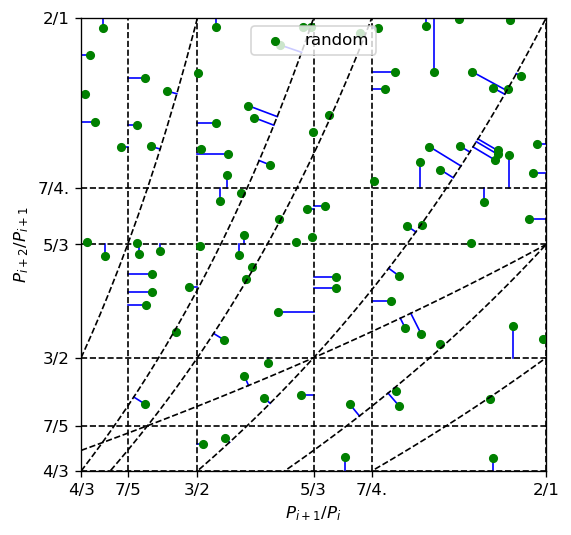

In [174]:
plt.figure(figsize=(5,5),dpi=120)
l1,l2=4/3.,2
plt.xlim(l1,l2)
plt.ylim(l1,l2)


plt.vlines(5/2.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.vlines(2/1.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.vlines(5/3.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.vlines(3/2.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.vlines(7/5.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.vlines(4/3.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.vlines(7/4.,l1,l2,linestyles='dashed',colors='black',lw=1)

plt.hlines(5/2.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.hlines(2/1.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.hlines(5/3.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.hlines(3/2.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.hlines(7/5.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.hlines(4/3.,l1,l2,linestyles='dashed',colors='black',lw=1)
plt.hlines(7/4.,l1,l2,linestyles='dashed',colors='black',lw=1)

plt.gca().set_xticks([4/3.,7/5.,3/2.,5/3.,2/1.,5/2.,7/4.])
plt.gca().set_xticklabels(['4/3','7/5','3/2','5/3','2/1','5/2','7/4.'])

plt.gca().set_yticks([4/3.,7/5.,3/2.,5/3.,2/1.,5/2.,7/4.])
plt.gca().set_yticklabels(['4/3','7/5','3/2','5/3','2/1','5/2','7/4.'])


dom=np.linspace(l1,l2,50)
for i in r3l:
    plt.plot(dom,fi_plot(dom,i[0],i[1],i[2]),linestyle='dashed',lw=1,c='black')


# plt.scatter(bx0,by0,color='red',s=20,zorder=100)

plt.scatter(new_x,new_y,color='green',s=20,label='random',zorder=2)


for row in range(len(df)):
    plt.plot(df[['x0','xmin']].loc[row].to_numpy(),df[['y0','ymin']].loc[row].to_numpy(),color='blue',zorder=1,lw=1)
    

plt.xlabel('$P_{i+1}/P_{i}$')
plt.ylabel('$P_{i+2}/P_{i+1}$')

plt.xlim(l1,l2)
plt.ylim(l1,l2)
plt.legend(loc='upper center')

plt.savefig('random.png',bbox_inches='tight',dpi=100)

plt.show()

In [176]:
sum(df['MinDistance'])

1.7262320110565526

In [210]:
tot_sum = np.array([])

for iii in range(1000):
    new_points=np.random.rand(sum(mask)*2)*(2. - 4/3.) + 4/3.
    new_x,new_y = np.reshape(new_points,(sum(mask),2)).T

    df = {'x0':new_x,'y0':new_y}
    df = pd.DataFrame(df)

    r3l=[]
    def add_res3(k1,k2,k3):
        global df,dist_p_l,new_x,new_y,r3l
        if [k1,k2,k3] in r3l:
            print([k1,k2,k3],' already there')
        else:
            df['x_'+str(k1)+str(k2)+str(k3)],df['y_'+str(k1)+str(k2)+str(k3)],df['dist_'+str(k1)+str(k2)+str(k3)] = dist_p_l(new_x,new_y,k1,k2,k3)
            r3l.append([k1,k2,k3])
        return

    add_res3(2,-5,3)
    add_res3(1,-3,2)
    add_res3(1,-5,5)
    add_res3(3,-5,2)
    add_res3(3,-7,4)
    add_res3(1,-2,1)
    add_res3(2,-7,5)
    add_res3(1,-4,3)
    add_res3(4,-7,3)

    df['x_n1n2_43'],df['y_n1n2_43'],df['dist_n1n2_43'] = dist_n1n2(new_x,new_y,4/3.)
    df['x_n2n3_43'],df['y_n2n3_43'],df['dist_n2n3_43'] = dist_n2n3(new_x,new_y,4/3.)

    df['x_n1n2_75'],df['y_n1n2_75'],df['dist_n1n2_75'] = dist_n1n2(new_x,new_y,7/5.)
    df['x_n2n3_75'],df['y_n2n3_75'],df['dist_n2n3_75'] = dist_n2n3(new_x,new_y,7/5.)

    df['x_n1n2_32'],df['y_n1n2_32'],df['dist_n1n2_32'] = dist_n1n2(new_x,new_y,3/2.)
    df['x_n2n3_32'],df['y_n2n3_32'],df['dist_n2n3_32'] = dist_n2n3(new_x,new_y,3/2.)

    df['x_n1n2_53'],df['y_n1n2_53'],df['dist_n1n2_53'] = dist_n1n2(new_x,new_y,5/3.)
    df['x_n2n3_53'],df['y_n2n3_53'],df['dist_n2n3_53'] = dist_n2n3(new_x,new_y,5/3.)

    df['x_n1n2_74'],df['y_n1n2_74'],df['dist_n1n2_74'] = dist_n1n2(new_x,new_y,7/4.)
    df['x_n2n3_74'],df['y_n2n3_74'],df['dist_n2n3_74'] = dist_n2n3(new_x,new_y,7/4.)

    df['x_n1n2_21'],df['y_n1n2_21'],df['dist_n1n2_21'] = dist_n1n2(new_x,new_y,2.)
    df['x_n2n3_21'],df['y_n2n3_21'],df['dist_n2n3_21'] = dist_n2n3(new_x,new_y,2.)

    df['MinDistance'] = df.filter(like='dist').min(axis=1)

    df['MinRes'] = df.filter(like='dist').idxmin(axis=1)

    MinDistInd=[]
    for i in range(len(new_x)):
        MinDistInd.append(df.columns.get_loc(df['MinRes'][i]))
    df['MinDistInd']=MinDistInd

    df['xmin']=[df[df.columns[j-2]][i] for i,j in enumerate(df['MinDistInd'])]

    df['ymin']=[df[df.columns[j-1]][i] for i,j in enumerate(df['MinDistInd'])]
    
    tot_sum = np.append(tot_sum,sum(1./df['MinDistance']))

In [211]:
np.mean(tot_sum)/len(new_x)

656.1593876825751

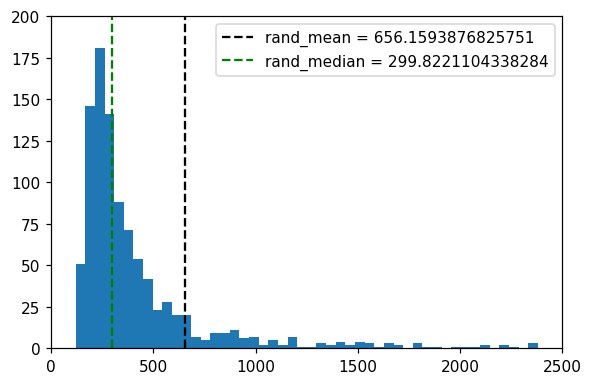

In [243]:
plt.figure(dpi=110)
plt.hist(tot_sum/len(new_x),bins='fd')

plt.vlines(np.mean(tot_sum)/len(new_x),0,200,color='black',linestyle='dashed',label='rand_mean = '+str(np.mean(tot_sum)/len(new_x)))
plt.vlines(np.median(tot_sum)/len(new_x),0,200,color='green',linestyle='dashed',label='rand_median = '+str(np.median(tot_sum)/len(new_x)))
# plt.vlines(tot_sum_obs,0,200,color='red',linestyle='dashed',label='obs = '+str(tot_sum_obs))


plt.xlim(0,2500)
plt.ylim(0,200)

plt.legend()
# plt.savefig('hist1.png',dpi=110)
plt.show()